# Actualización de una Proporción

En esta libreta exploraremos cómo podemos realizar una actualización bayesiana de la estimación de una proporción en estudios seriados.


## Librerías

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
print('Librerías importadas')

Librerías importadas



Tomaremos como base el siguiente paper.

> Fombonne E, Marcin C, Manero AC, Bruno R, Diaz C, Villalobos M, Ramsay K, Nealy B. Prevalence of Autism Spectrum Disorders in Guanajuato, Mexico: The Leon survey. J Autism Dev Disord. 2016 May;46(5):1669-85. doi: 10.1007/s10803-016-2696-6. PMID: 26797939.

Se describe que de la muestra de 432 niños, 31 presentaron autismo, una proporción de 0.7%; aunque en el estudio se estima la prevalencia en 0.87% este número se obtuvo por simulación, así que tomaremos el valor empírico.

In [10]:
n = 432
casos = 31
prop = casos/n
print(f'Prevalencia: {prop:.2%}')

Prevalencia: 7.18%


Podemos modelar la proporción con la distribución beta, utilizando `scipy`.
La distribución Beta se define: $~Beta(\alpha; \beta)$, donde alfa es el número de casos positivos y beta los negativos, es decir $\beta = n - \alpha$.
 

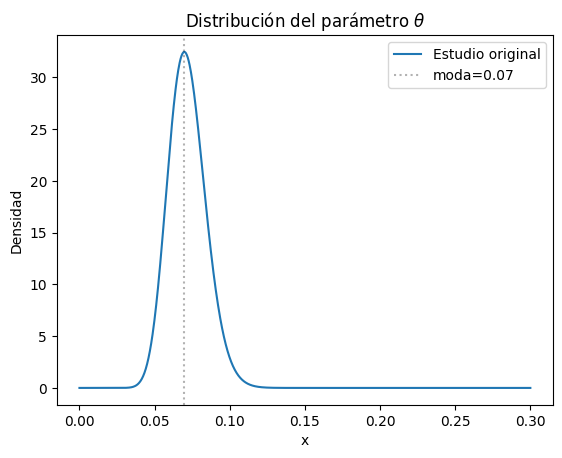

In [49]:
# función helper para no repetir el código muchas veces.

def plot_beta(alfa, beta, label=None):
    """Esta función grafica la distribución con los parámetros dados"""
    # obtenemos la densidad en el intervalo 0,1
    dist = stats.beta(alfa, beta)
    y = dist.pdf(x)
    plt.plot(x, y, label=label)
    moda = (alfa - 1) / (alfa + beta - 2)
    plt.axvline(moda, ls=':', color='k', alpha=0.3, label=f'moda={moda:.2f}')
    plt.title(r'Distribución del parámetro $\theta$')
    plt.xlabel('x')
    plt.ylabel('Densidad')
    plt.legend()


# x es un vector unidimensional del 0 al 0.3 con 1000 elementos.
x = np.linspace(0, 0.3, 1000) # 1000 es solo para la resolución
alfa = casos
beta = n- alfa

plot_beta(alfa, beta, label='Estudio original')

Ahora supongamos que un estudio reciente encontró que en una cohorte de 157 niños, 15 tenían autismo. Podemos realizar una actualización bayesiana de la siguiente manera.

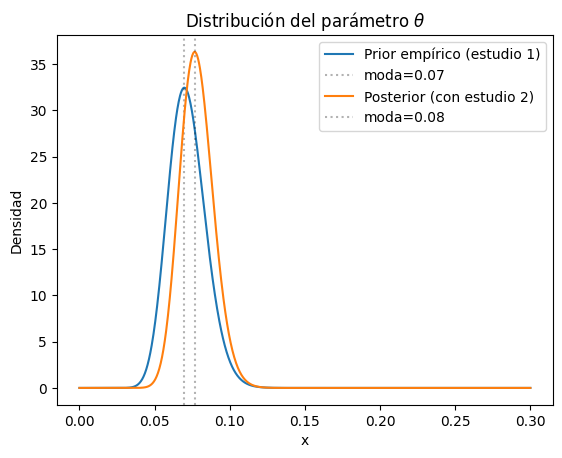

In [50]:
alfa2 = alfa + 15 # agregamos al parámetro alfa nuestro 
beta2 = n + 157 - alfa2

plot_beta(alfa, beta, label='Prior empírico (estudio 1)')
plot_beta(alfa2, beta2, label='Posterior (con estudio 2)')

La proporción del estudio de replicación fue $15/157 = 0.0955$, pero al realizar la actualización bayesiana con la distribución Beta, el nuevo máximo a posteriori para la prevalencia es $MAP ~ Beta(\alpha_2, \beta_2) \approx 0.08$, MAP es "maximo a posteriori" y para la distribución beta es la moda, que cuando alfa y beta son mayores de 1, se define como:

$$
moda = \frac{\alpha - 1}{\alpha + \beta -2}
$$



## Ejercicios
1. Prueba la actualización con diferentes valores de alfa y beta.
2. Ejecuta el análisis con datos que sean de tu interés. Puedes utilizar este método para combinar diferentes fuentes de información.
3. Revisa la distribución beta y ajusta la función `plot_beta` para contemplar otros casos de alfa y beta para la moda.
4. Ajusta el eje x de la gráfica para que cubra el 99% de probabilidad de la distribución (por ejemplo, usando `ppf(0.001)` y `ppf(0.999)`), y compara cómo cambia la visualización con respecto al rango fijo original.
